In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [93]:
sns.set_style("whitegrid")

In [94]:
color1 = "#96bf04"
color2 = "#2d04bf"
color3 = "#bf8b04"
color4 = "#bf0496"

In [95]:
palette = [color1, color2, color3, color4]

In [96]:
data = pd.read_csv("simpson_results.csv")

data.head()

,Model,Spacing,Accuracy,Set Size
0,Baseline,0.05,0.5316,1
1,Multi-Head Attention,0.05,0.5906,8
2,TopK,0.05,0.5773,8
3,Mean,0.05,0.5874,8
4,Multi-Head Attention,0.05,0.6733,32


In [97]:
set_sizes = pd.unique(data["Set Size"])
set_sizes = set_sizes[set_sizes != 1]

/tmp/ipykernel_627290/1013812987.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


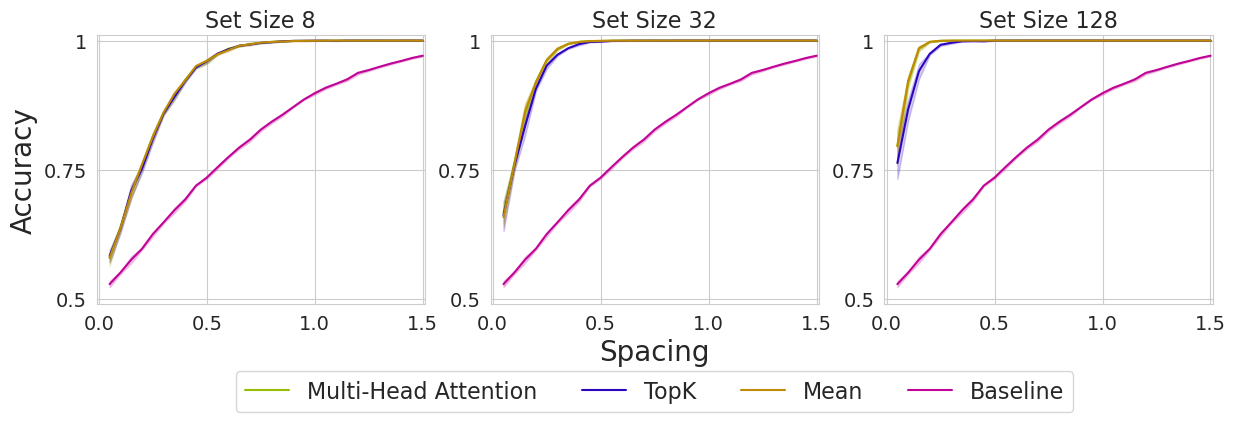

In [101]:
fig = plt.figure(figsize=plt.figaspect(1 / len(set_sizes)))
gs = GridSpec(2, len(set_sizes), height_ratios=[1, 0.1], hspace=0.5)

axes = [fig.add_subplot(gs[0, 0])]
axes += [fig.add_subplot(gs[0, i], sharey=axes[0]) for i in range(1, len(set_sizes))]
legend_ax = fig.add_subplot(gs[1, :])

for ax, set_size in zip(axes, set_sizes):
    encoders = data[data["Set Size"] == set_size]
    baseline = data[data["Model"] == "Baseline"]
    
    plot_data = pd.concat([encoders, baseline], ignore_index=True)
    
    sns.lineplot(data=plot_data, x="Spacing", y="Accuracy", hue="Model", palette=palette, ax=ax)
    
    # remove the individual legend
    ax.get_legend().remove()
    
    # use fewer ticks
    ax.set_xticks([0, 0.5, 1, 1.5])
    
    # make ticks bigger
    ax.tick_params(axis="both", which="major", labelsize=14)
    
    # delete labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # delete y ticks
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    # set title
    ax.set_title(f"Set Size {set_size}", fontsize=16)
    
    ax.set_xlim(-0.01, 1.51)
    ax.set_ylim(0.49, 1.01)

axes[0].set_ylabel("Accuracy", fontsize=20)
axes[0].set_yticks([0.5, 0.75, 1])
axes[0].set_yticklabels([0.5, 0.75, 1])
axes[1].set_xlabel("Spacing", fontsize=20)

handles, labels = axes[0].get_legend_handles_labels()

# Create a legend in the extra row
legend_ax.legend(handles, labels, loc="center", ncol=4, fontsize=16)
# Hide the extra axes
legend_ax.axis("off")

plt.tight_layout()
plt.savefig(f"figures/spacing.png", dpi=150)
plt.show()

In [83]:
model = "Multi-Head Attention"
df = data[data["Model"].isin([model, "Baseline"])]

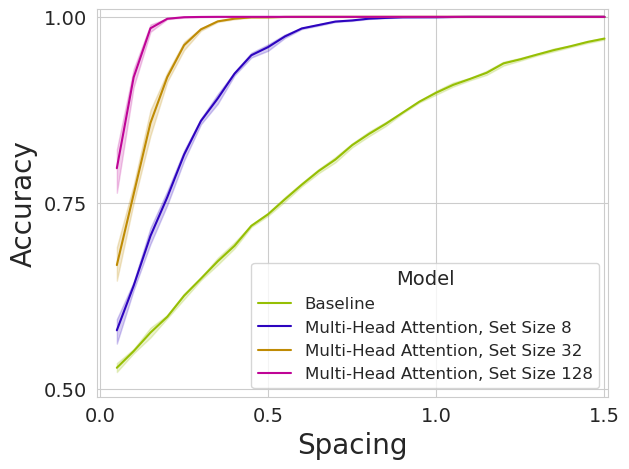

In [91]:
sns.lineplot(data=df, x="Spacing", y="Accuracy", hue="Set Size", palette=palette)

plt.xlim(-0.01, 1.51)
plt.ylim(0.49, 1.01)

# fewer ticks
plt.xticks([0, 0.5, 1, 1.5])
plt.yticks([0.5, 0.75, 1])

# bigger ticks
plt.tick_params(axis="both", which="major", labelsize=14)

# bigger axis labels
plt.xlabel("Spacing", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)

# different legend labels
handles, _ = plt.gca().get_legend_handles_labels()
labels = ["Baseline"] + [f"{model}, Set Size {set_size}" for set_size in set_sizes]
plt.legend(handles, labels, loc="lower right", title="Model", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.savefig(f"figures/spacing-{model.lower().replace(' ', '-')}.png", dpi=150)
plt.show()